In [2]:
from helper_knn import *
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterSampler

db = pd.read_csv('lc_db_processed.csv').drop(columns = 'Unnamed: 0')
db = pd.concat([db,
                pd.DataFrame(pd.DataFrame(db['pubchem2d'].values).\
                             apply(lambda x: x.str.replace('', ' ').str.strip().str.split(' '), 
                                                                        axis = 1)[0].to_list(),
                   columns = ['pub'+ str(i) for i in range(1,882)])],
               axis = 1)

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

for nc in numerical:
    minmax = MinMaxScaler()
    minmax.fit(db[[nc]])
    db[[nc]] = minmax.transform(db[[nc]])


categorical = ['obs_duration_mean',
               'conc1_type', 'exposure_type', 'control_type', 'media_type',
               'application_freq_unit', 'species', 'class', 'tax_order', 'family', 'genus']

ohe = OneHotEncoder(sparse = False)
ohe.fit(db[categorical])

finaldb = pd.concat([db.drop(columns = categorical),
                     pd.DataFrame(ohe.transform(db[categorical]), columns = ohe.get_feature_names(categorical))],
                    axis = 1)

X = finaldb.drop(columns = ['test_cas','conc1_mean', 'fish', 'smiles','pubchem2d'])
y = np.where(finaldb['conc1_mean']> 1, 0,1)

#  Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
f1s = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    
    lrc = LogisticRegression(n_jobs = -1)
    lrc.fit(X_train, y_train)
    y_pred = lrc.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    f1s.append(f1_score(y_test, y_pred))
    
print('Accuracy:   ', np.mean(accs), 'se:', sem(accs))
print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
print('Specificity:', np.mean(specs), 'se:', sem(specs))
print('F1 score:   ', np.mean(f1s), 'se:', sem(f1s))

Accuracy:    0.867994717565637 se: 0.0019192924259399985
Sensitivity: 0.8066958429632907 se: 0.003852596267124875
Specificity: 0.9061087437164688 se: 0.001583719938317112
F1 score:    0.8239484043350263 se: 0.0023829658423257633


# KNN

In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
f1s = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    f1s.append(f1_score(y_test, y_pred))

print('Accuracy:', np.mean(accs), 'se:', sem(accs))
print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
print('Specificity:', np.mean(specs), 'se:', sem(specs))
print('F1 score:   ', np.mean(f1s), 'se:', sem(f1s))

Accuracy: 0.9140995701851014 se: 0.0014541868036512522
Sensitivity: 0.885716811157683 se: 0.0034567513587959926
Specificity: 0.9317999922521742 se: 0.002626326772853722
F1 score:    0.887625197440299 se: 0.0012960535531658225


In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
f1s = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    knn = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    f1s.append(f1_score(y_test, y_pred))

print('Accuracy:', np.mean(accs), 'se:', sem(accs))
print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
print('Specificity:', np.mean(specs), 'se:', sem(specs))
print('F1 score:   ', np.mean(f1s), 'se:', sem(f1s))

Accuracy: 0.9100750710444224 se: 0.00205340741947505
Sensitivity: 0.87473387906622 se: 0.00453108550497091
Specificity: 0.9320253679375125 se: 0.0007825209315078899
F1 score:    0.8816340619326517 se: 0.0028304249321715142


In [8]:
def knn_bruteforce(X, y, k):
    kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
    accs = []
    sens = []
    specs = []
    f1s = []
    for train_index, test_index in kf.split(X):
        X_train = X.iloc[train_index]
        X_test = X.iloc[test_index]
        y_train = y[train_index]
        y_test = y[test_index]

        knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        accs.append(accuracy_score(y_test, y_pred))
        sens.append(recall_score(y_test, y_pred))
        specs.append(tn/(tn+fp))
        f1s.append(f1_score(y_test, y_pred))
    
    return np.mean(accs)

1 0.9104726976516
2 0.9041133131539404
3 0.9100750710444224
4 0.9049579349137439
5 0.9012816197819762
7 0.8937796990370049
9 0.8907986658150593
11 0.8863768609627485
13 0.8825015782506874
17 0.8753971483493934
21 0.8707766474437892
31 0.8609893333086489


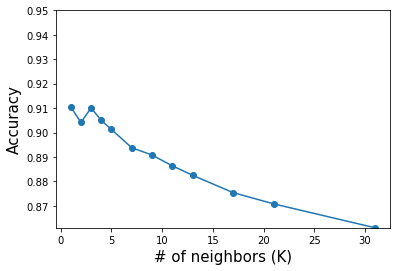

In [12]:
accs_k = []
ks = [1,2,3,4,5,7,9,11,13,17,21,31]
for k in ks:
    print(k, end = '')
    accs_k.append(knn_bruteforce(X, y, k))
    
import matplotlib.pyplot as plt

for i in range(0, len(ks)):
    print(ks[i], accs_k[i])

plt.plot(ks, accs_k, '-o')
plt.ylim(min(accs_k), 0.95)
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('# of neighbors (K)', fontsize = 15)
plt.show()

# Random Forest -- sklearn

In [5]:
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
f1s = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    rfc = RandomForestClassifier(n_jobs = -1)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    f1s.append(f1_score(y_test, y_pred))

print('Accuracy:', np.mean(accs), 'se:', sem(accs))
print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
print('Specificity:', np.mean(specs), 'se:', sem(specs))
print('F1 score:   ', np.mean(f1s), 'se:', sem(f1s))

Accuracy: 0.9267189602984327 se: 0.001701580050689323
Sensitivity: 0.890379124574704 se: 0.003505978948287562
Specificity: 0.9493090196254297 se: 0.0023797915351203283
F1 score:    0.9028961327376075 se: 0.0029314370118961952


## Ottimizzazione RF con Random Search

In [3]:
hyper_params_tune = {'max_depth' : [i for i in range(10,30,2)],
                     'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 11)],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 2, 4, 8, 16, 32]}

params_comb = list(ParameterSampler(hyper_params_tune, n_iter = 100, random_state = 52))

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)

test_acc = dict()
test_sens = dict()
test_spec = dict()
test_f1 = dict()

for i in range(0,len(params_comb)):
    test_acc['mod' + str(i)] = list()
    test_sens['mod' + str(i)] = list()
    test_spec['mod' + str(i)] = list()
    test_f1['mod' + str(i)] = list()
    
print(ctime())


for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    for i in range(0, len(params_comb)):     
        rfc = RandomForestClassifier(n_jobs = -1)
        
        for k,v in params_comb[i].items():
            setattr(rfc, k, v)
        
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)
    
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
        test_acc['mod' + str(i)].append(accuracy_score(y_test, y_pred))
        test_sens['mod' + str(i)].append(recall_score(y_test, y_pred))
        test_spec['mod' + str(i)].append(tn/(tn+fp))
        test_f1['mod' + str(i)].append(f1_score(y_test, y_pred))

print(ctime())

tab_rf_rasar = pd.DataFrame(columns = ['test_acc', 'test_sens', 'test_spec', 'test_f1'])

tab_rf_rasar.loc[:,'test_acc'] = pd.DataFrame(test_acc).mean(axis = 0)
tab_rf_rasar.loc[:,'test_sens'] = pd.DataFrame(test_sens).mean(axis = 0)
tab_rf_rasar.loc[:,'test_spec'] = pd.DataFrame(test_spec).mean(axis = 0)
tab_rf_rasar.loc[:,'test_f1'] = pd.DataFrame(test_f1).mean(axis = 0)

params_df = pd.DataFrame(params_comb, index = ['mod' + str(i) for i in range(0,100)])
tab_rf_rasar = pd.concat([params_df, tab_rf_rasar], axis = 1)
tab_rf_rasar

Tue Feb 16 13:16:19 2021
Tue Feb 16 15:27:50 2021


NameError: name 'params_list' is not defined

In [5]:
tab_rf_rasar = pd.DataFrame(columns = ['test_acc', 'test_sens', 'test_spec', 'test_f1'])

tab_rf_rasar.loc[:,'test_acc'] = pd.DataFrame(test_acc).mean(axis = 0)
tab_rf_rasar.loc[:,'test_sens'] = pd.DataFrame(test_sens).mean(axis = 0)
tab_rf_rasar.loc[:,'test_spec'] = pd.DataFrame(test_spec).mean(axis = 0)
tab_rf_rasar.loc[:,'test_f1'] = pd.DataFrame(test_f1).mean(axis = 0)

params_df = pd.DataFrame(params_comb, index = ['mod' + str(i) for i in range(0,100)])
tab_rf_rasar = pd.concat([params_df, tab_rf_rasar], axis = 1)
tab_rf_rasar

,n_estimators,min_samples_split,min_samples_leaf,max_depth,test_acc,test_sens,test_spec,test_f1
mod0,920,2,1,20,0.917826,0.873143,0.945635,0.890478
mod1,600,2,8,28,0.876143,0.790837,0.929075,0.830152
mod2,600,5,1,22,0.914398,0.866720,0.944002,0.885669
mod3,360,2,8,28,0.876540,0.790458,0.929964,0.830538
mod4,840,2,1,10,0.870479,0.756777,0.940990,0.817223
...,...,...,...,...,...,...,...,...
mod95,1000,2,8,20,0.875199,0.789141,0.928588,0.828765
mod96,920,2,8,12,0.867398,0.761709,0.933017,0.814743
mod97,920,5,32,28,0.848172,0.717306,0.929297,0.783360
mod98,840,10,4,24,0.886427,0.818733,0.928418,0.846587


In [7]:
tab_rf_rasar.to_csv('rf_tuning_table3.csv')

In [6]:
tab_rf_rasar[tab_rf_rasar.test_acc == tab_rf_rasar.test_acc.max()]

,n_estimators,min_samples_split,min_samples_leaf,max_depth,test_acc,test_sens,test_spec,test_f1
mod47,440,2,1,28,0.927216,0.890237,0.950196,0.903472


## RF Ottimizzato

In [3]:
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
f1s = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    rfc = RandomForestClassifier(n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1, max_depth = 28,
                                 n_jobs = -1)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    f1s.append(f1_score(y_test, y_pred))

print('Accuracy:', np.mean(accs), 'se:', sem(accs))
print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
print('Specificity:', np.mean(specs), 'se:', sem(specs))
print('F1 score:   ', np.mean(f1s), 'se:', sem(f1s))

Accuracy: 0.9263713070013854 se: 0.0011547654495563742
Sensitivity: 0.8889570391694093 se: 0.0026440260943412213
Specificity: 0.9496314828870442 se: 0.002039631840720036
F1 score:    0.9023443297430431 se: 0.00238099172921514


# Feature Importance -- Random Forest

# Simple RASAR

In [3]:
from sklearn.linear_model import LogisticRegression

def right_neighbor(neighbors, X_train, X_train_i):
    # IDX Neighbors
    idx_neigh_0 = pd.DataFrame(neighbors[1])[0].apply(lambda x: X_train_i.iloc[x].name)
    idx_neigh_1 = pd.DataFrame(neighbors[1])[1].apply(lambda x: X_train_i.iloc[x].name)
    
    idx_neigh = idx_neigh_0.copy()
    
    # dove l'indice del primo vicino risulta essere uguale a se stesso lo sostituisco con il secondo vicino
    idx_neigh[X_train.index == idx_neigh_0] = idx_neigh_1[X_train.index == idx_neigh_0].values
    
    # Distance from the Nearest Neighbor that is NOT itself
    dist_0 = pd.DataFrame(neighbors[0])[0]
    dist_1 = pd.DataFrame(neighbors[0])[1]
    
    distance = dist_0.copy()
    distance[X_train.index == idx_neigh_0] = dist_1[X_train.index == idx_neigh_0].values
    
    return idx_neigh, distance

def df_train_simple_rasar(X_train, y_train):
    
    X_train0 = X_train[y_train == 0].copy()
    X_train1 = X_train[y_train == 1].copy()
    
    knn0 = KNeighborsClassifier(n_neighbors = 2)
    knn0.fit(X_train0, y_train[y_train == 0])

    neigh_train0 = knn0.kneighbors(X_train, return_distance = True)
    idx_neigh0, dist0 = right_neighbor(neigh_train0, X_train, X_train0)

    knn1 = KNeighborsClassifier(n_neighbors = 2)
    knn1.fit(X_train1, y_train[y_train == 1])

    neigh_train1 = knn1.kneighbors(X_train, return_distance = True)
    idx_neigh1, dist1 = right_neighbor(neigh_train1, X_train, X_train1)

    df_rasar_train = pd.DataFrame({'dist_neigh0': dist0, 'dist_neigh1': dist1, 'label_train': y_train})
    
    return df_rasar_train

def df_test_simple_rasar(X_train, X_test, y_train, y_test):
    
    X_train0 = X_train[y_train == 0].copy()
    X_train1 = X_train[y_train == 1].copy()
    
    knn0 = KNeighborsClassifier(n_neighbors = 1)
    knn0.fit(X_train0, y_train[y_train == 0])
    neigh_test0 = knn0.kneighbors(X_test, return_distance = True)

    knn1 = KNeighborsClassifier(n_neighbors = 1)
    knn1.fit(X_train1, y_train[y_train == 1])
    neigh_test1 = knn1.kneighbors(X_test, return_distance = True)

    df_rasar_test = pd.DataFrame({'dist_neigh0': neigh_test0[0].ravel(), 'dist_neigh1': neigh_test1[0].ravel(),
                                 'label_test': y_test})
    
    return df_rasar_test

In [7]:
accs = []
sens = []
specs = []
f1s = []

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
print(ctime())
for train_index, test_index in kf.split(X):
    
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    X_train0 = X_train[y_train == 0].copy()
    X_train1 = X_train[y_train == 1].copy()

    ## DF Train

    knn0 = KNeighborsClassifier(n_neighbors = 2)
    knn0.fit(X_train0, y_train[y_train == 0])

    neigh_train0 = knn0.kneighbors(X_train, return_distance = True)
    idx_neigh0, dist0 = right_neighbor(neigh_train0, X_train, X_train0)

    knn1 = KNeighborsClassifier(n_neighbors = 2)
    knn1.fit(X_train1, y_train[y_train == 1])

    neigh_train1 = knn1.kneighbors(X_train, return_distance = True)
    idx_neigh1, dist1 = right_neighbor(neigh_train1, X_train, X_train1)

    df_rasar_train = pd.DataFrame({'idx_train': X_train.index.values,
                          'label_train': y_train,
                          'idx_neigh0': idx_neigh0.values,
                          'dist_neigh0': dist0,       
                          'idx_neigh1': idx_neigh1.values,
                          'dist_neigh1': dist1})

    # DF test
    knn0 = KNeighborsClassifier(n_neighbors = 1)
    knn0.fit(X_train0, y_train[y_train == 0])
    neigh_test0 = knn0.kneighbors(X_test, return_distance = True)
    idx_neigh_test0 = pd.DataFrame(neigh_test0[1])[0].apply(lambda x: X_train0.iloc[x].name)

    knn1 = KNeighborsClassifier(n_neighbors = 1)
    knn1.fit(X_train1, y_train[y_train == 1])
    neigh_test1 = knn1.kneighbors(X_test, return_distance = True)
    idx_neigh_test1 = pd.DataFrame(neigh_test1[1])[0].apply(lambda x: X_train1.iloc[x].name)

    df_rasar_test = pd.DataFrame({'idx_test': X_test.index.values,
                  'label_test': y_test,
                  'idx_neigh0': idx_neigh_test0.values,
                  'dist_neigh0': neigh_test0[0].ravel(),
                  'idx_neigh1': idx_neigh_test1.values,
                  'dist_neigh1': neigh_test1[0].ravel()})


    lrc = LogisticRegression()
    lrc.fit(df_rasar_train[['dist_neigh0','dist_neigh1']], y_train)
    y_pred = lrc.predict(df_rasar_test[['dist_neigh0','dist_neigh1']])
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    f1s.append(f1_score(y_test, y_pred))
    
print(ctime())
print('Accuracy:   ', np.mean(accs), 'se:', sem(accs))
print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
print('Specificity:', np.mean(specs), 'se:', sem(specs))
print('F1 score:   ', np.mean(f1s), 'se:', sem(f1s))

Mon Feb 15 12:43:39 2021
Mon Feb 15 12:57:08 2021
Accuracy:    0.9106714430734388 se: 0.001155777787782416
Sensitivity: 0.886637849028219 se: 0.010860760023551052
Specificity: 0.9259646134622166 se: 0.005994301301294386
F1 score:    0.8836911543707963 se: 0.0018376664655148285


## Ottimizzazione LR interna

In [14]:
from sklearn.model_selection import ParameterSampler
# parametri Logistic Regression
################## NON TOCCARE LA GRIGLIA ####################
hyper_params_tune = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['elasticnet'],
    'max_iter': list(range(100,800,100)),
    'l1_ratio': [int(i)/10 for i in range(0,11,1)],
    'solver': ['saga'],
    'fit_intercept': [True, False]
}

params_comb = list(ParameterSampler(hyper_params_tune, n_iter = 100, random_state = 52))

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)

test_acc = dict()
test_sens = dict()
test_spec = dict()
test_f1 = dict()


for i in range(0,len(params_comb)):
    test_acc['mod' + str(i)] = list()
    test_sens['mod' + str(i)] = list()
    test_spec['mod' + str(i)] = list()
    test_f1['mod' + str(i)] = list()
    
print(ctime())

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)

for train_index, test_index in kf.split(X):
    
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    df_rasar_train = df_train_simple_rasar(X_train, y_train)

    df_rasar_test = df_test_simple_rasar(X_train, X_test, y_train, y_test)
    
    for i in range(0, len(params_comb)):     
        lrc = LogisticRegression(n_jobs = -1)
        
        for k,v in params_comb[i].items():
            setattr(lrc, k, v)
        
        lrc.fit(df_rasar_train[['dist_neigh0','dist_neigh1']], y_train)
        y_pred = lrc.predict(df_rasar_test[['dist_neigh0','dist_neigh1']])
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        
        test_acc['mod' + str(i)].append(accuracy_score(y_test, y_pred))
        test_sens['mod' + str(i)].append(recall_score(y_test, y_pred))
        test_spec['mod' + str(i)].append(tn/(tn+fp))
        test_f1['mod' + str(i)].append(f1_score(y_test, y_pred))
        
print(ctime())

tab_lr_rasar = pd.DataFrame(columns = ['test_acc', 'test_sens', 'test_spec', 'test_f1'])

tab_lr_rasar.loc[:,'test_acc'] = pd.DataFrame(test_acc).mean(axis = 0)
tab_lr_rasar.loc[:,'test_sens'] = pd.DataFrame(test_sens).mean(axis = 0)
tab_lr_rasar.loc[:,'test_spec'] = pd.DataFrame(test_spec).mean(axis = 0)
tab_lr_rasar.loc[:,'test_f1'] = pd.DataFrame(test_f1).mean(axis = 0)

params_df = pd.DataFrame(params_comb, index = ['mod' + str(i) for i in range(0,100)])
tab_lr_rasar = pd.concat([params_df, tab_lr_rasar], axis = 1)
tab_lr_rasar

Tue Feb 16 16:23:13 2021
Tue Feb 16 16:37:13 2021


,solver,penalty,max_iter,l1_ratio,fit_intercept,C,test_acc,test_sens,test_spec,test_f1
mod0,saga,elasticnet,600,0.5,False,0.001,0.913056,0.847975,0.953570,0.881935
mod1,saga,elasticnet,400,0.5,False,1000.000,0.912162,0.849519,0.951145,0.881059
mod2,saga,elasticnet,600,0.1,False,0.001,0.913056,0.848350,0.953325,0.881979
mod3,saga,elasticnet,700,0.2,False,1000.000,0.912162,0.849519,0.951145,0.881059
mod4,saga,elasticnet,400,0.6,True,0.100,0.910671,0.886638,0.925965,0.883691
...,...,...,...,...,...,...,...,...,...,...
mod95,saga,elasticnet,100,0.1,True,0.001,0.910274,0.892284,0.921630,0.883923
mod96,saga,elasticnet,400,0.1,True,100.000,0.910721,0.886768,0.925965,0.883763
mod97,saga,elasticnet,300,0.4,True,0.001,0.910324,0.892032,0.921866,0.883958
mod98,saga,elasticnet,100,0.3,False,0.001,0.913156,0.848350,0.953488,0.882097


In [15]:
tab_lr_rasar[tab_lr_rasar.test_acc == tab_lr_rasar.test_acc.max()]

,solver,penalty,max_iter,l1_ratio,fit_intercept,C,test_acc,test_sens,test_spec,test_f1
mod98,saga,elasticnet,100,0.3,False,0.001,0.913156,0.84835,0.953488,0.882097


## Simple RASAR ottimizzato

In [16]:
accs = []
sens = []
specs = []
f1s = []

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
print(ctime())
for train_index, test_index in kf.split(X):
    
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    df_rasar_train = df_train_simple_rasar(X_train, y_train)

    df_rasar_test = df_test_simple_rasar(X_train, X_test, y_train, y_test)

    lrc = LogisticRegression(solver = 'saga', penalty = 'elasticnet', max_iter = 100, l1_ratio = 0.3, fit_intercept = False,
                            C = 0.001)
    lrc.fit(df_rasar_train[['dist_neigh0','dist_neigh1']], y_train)
    y_pred = lrc.predict(df_rasar_test[['dist_neigh0','dist_neigh1']])
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    f1s.append(f1_score(y_test, y_pred))
    
print(ctime())
print('Accuracy:   ', np.mean(accs), 'se:', sem(accs))
print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
print('Specificity:', np.mean(specs), 'se:', sem(specs))
print('F1 score:   ', np.mean(f1s), 'se:', sem(f1s))

Tue Feb 16 16:45:22 2021
Tue Feb 16 16:55:57 2021
Accuracy:    0.9131556929646738 se: 0.0007549573886498482
Sensitivity: 0.8483495902036337 se: 0.0034166970701598118
Specificity: 0.9534879387953344 se: 0.002162246603323119
F1 score:    0.8820968142313564 se: 0.0006470064932328608


## Simple RASAR con RF

In [18]:
accs = []
sens = []
specs = []
f1s = []

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
print(ctime())
for train_index, test_index in kf.split(X):
    
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    df_rasar_train = df_train_simple_rasar(X_train, y_train)

    df_rasar_test = df_test_simple_rasar(X_train, X_test, y_train, y_test)

    rfc = RandomForestClassifier(n_jobs = -1)
    
    rfc.fit(df_rasar_train[['dist_neigh0','dist_neigh1']], y_train)
    y_pred = rfc.predict(df_rasar_test[['dist_neigh0','dist_neigh1']])
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    f1s.append(f1_score(y_test, y_pred))
    
print(ctime())
print('Accuracy:   ', np.mean(accs), 'se:', sem(accs))
print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
print('Specificity:', np.mean(specs), 'se:', sem(specs))
print('F1 score:   ', np.mean(f1s), 'se:', sem(f1s))

Tue Feb 16 17:04:07 2021
Tue Feb 16 17:15:01 2021
Accuracy:    0.9050077230918285 se: 0.0010252607159394935
Sensitivity: 0.8577968214884709 se: 0.00816503253496411
Specificity: 0.9344158416059823 se: 0.005992256233273244
F1 score:    0.8736366732684292 se: 0.0016162753711011313


In [4]:
hyper_params_tune = {'max_depth' : [i for i in range(10,30,2)],
                     'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 11)],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 2, 4, 8, 16, 32]}

params_comb = list(ParameterSampler(hyper_params_tune, n_iter = 100, random_state = 52))

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)

test_acc = dict()
test_sens = dict()
test_spec = dict()
test_f1 = dict()


for i in range(0,len(params_comb)):
    test_acc['mod' + str(i)] = list()
    test_sens['mod' + str(i)] = list()
    test_spec['mod' + str(i)] = list()
    test_f1['mod' + str(i)] = list()
    
print(ctime())

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)

for train_index, test_index in kf.split(X):
    
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    df_rasar_train = df_train_simple_rasar(X_train, y_train)

    df_rasar_test = df_test_simple_rasar(X_train, X_test, y_train, y_test)
    
    for i in range(0, len(params_comb)):     
        rfc = RandomForestClassifier(n_jobs = -1)
        
        for k,v in params_comb[i].items():
            setattr(rfc, k, v)
        
        rfc.fit(df_rasar_train[['dist_neigh0','dist_neigh1']], y_train)
        y_pred = rfc.predict(df_rasar_test[['dist_neigh0','dist_neigh1']])
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        
        test_acc['mod' + str(i)].append(accuracy_score(y_test, y_pred))
        test_sens['mod' + str(i)].append(recall_score(y_test, y_pred))
        test_spec['mod' + str(i)].append(tn/(tn+fp))
        test_f1['mod' + str(i)].append(f1_score(y_test, y_pred))
        
print(ctime())

tab_rf_rasar = pd.DataFrame(columns = ['test_acc', 'test_sens', 'test_spec', 'test_f1'])

tab_rf_rasar.loc[:,'test_acc'] = pd.DataFrame(test_acc).mean(axis = 0)
tab_rf_rasar.loc[:,'test_sens'] = pd.DataFrame(test_sens).mean(axis = 0)
tab_rf_rasar.loc[:,'test_spec'] = pd.DataFrame(test_spec).mean(axis = 0)
tab_rf_rasar.loc[:,'test_f1'] = pd.DataFrame(test_f1).mean(axis = 0)

params_df = pd.DataFrame(params_comb, index = ['mod' + str(i) for i in range(0,100)])
tab_rf_rasar = pd.concat([params_df, tab_rf_rasar], axis = 1)
tab_rf_rasar

Wed Feb 17 11:59:21 2021
Wed Feb 17 12:41:06 2021


,n_estimators,min_samples_split,min_samples_leaf,max_depth,test_acc,test_sens,test_spec,test_f1
mod0,920,2,1,20,0.905803,0.856181,0.936657,0.874342
mod1,600,2,8,28,0.912162,0.877326,0.933955,0.884370
mod2,600,5,1,22,0.906995,0.855995,0.938757,0.875743
mod3,360,2,8,28,0.912311,0.878273,0.933645,0.884655
mod4,840,2,1,10,0.912410,0.861882,0.943936,0.882855
...,...,...,...,...,...,...,...,...
mod95,1000,2,8,20,0.912857,0.879408,0.933804,0.885407
mod96,920,2,8,12,0.912559,0.878326,0.933955,0.884929
mod97,920,5,32,28,0.912460,0.856393,0.947484,0.882266
mod98,840,10,4,24,0.912808,0.870557,0.939582,0.884337


In [6]:
tab_rf_rasar[tab_rf_rasar.test_acc == tab_rf_rasar.test_acc.max()]

,n_estimators,min_samples_split,min_samples_leaf,max_depth,test_acc,test_sens,test_spec,test_f1
mod48,760,5,2,10,0.913901,0.863105,0.945518,0.884764


## Simple RASAR con RF ottimizzato

In [7]:
accs = []
sens = []
specs = []
f1s = []

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
print(ctime())
for train_index, test_index in kf.split(X):
    
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    df_rasar_train = df_train_simple_rasar(X_train, y_train)

    df_rasar_test = df_test_simple_rasar(X_train, X_test, y_train, y_test)

    rfc = RandomForestClassifier(n_estimators = 760, min_samples_split = 5, min_samples_leaf = 2, max_depth = 10,
                                 n_jobs = -1)
    
    rfc.fit(df_rasar_train[['dist_neigh0','dist_neigh1']], y_train)
    y_pred = rfc.predict(df_rasar_test[['dist_neigh0','dist_neigh1']])
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    f1s.append(f1_score(y_test, y_pred))
    
print(ctime())
print('Accuracy:   ', np.mean(accs), 'se:', sem(accs))
print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
print('Specificity:', np.mean(specs), 'se:', sem(specs))
print('F1 score:   ', np.mean(f1s), 'se:', sem(f1s))

Wed Feb 17 12:43:37 2021
Wed Feb 17 12:54:55 2021
Accuracy:    0.9131059047865889 se: 0.001239417368489396
Sensitivity: 0.868964065189559 se: 0.010574112965685329
Specificity: 0.941012314079226 se: 0.00806799398943762
F1 score:    0.8845022424628125 se: 0.0009886585231183953
